In [87]:
import pandas as pd

def plot_e_consumption():
    yearly=df_e_consumption[['Year','Electricity consumption (GWh)']].groupby('Year').sum()
    yearly.plot(title='Total Energy Consumption')
    return yearly
    
def plot_nat_gas():
    df_natgas_prod=pd.read_excel(nat_prod)
    df_natgas_prod=df_natgas_prod.drop(['Natural gas marketed production\n(million standard cu m)'],axis=1).T
    df_natgas_prod.columns=['natgas']
    df_natgas_prod.plot(title='Natural Gas Production')
    
def stacked_bar_e_consumption():
    summary=df_e_consumption.groupby(['Year','consumbiion category']).sum()
    e=summary.reset_index()
    e.columns=['year','category','consumption']
    e.year=e.year.apply(lambda x:int(x))

    commercial=e[e['category']=='Commercial'].set_index('year')
    commercial.drop('category',axis=1,inplace=True)
    commercial.columns=['commercial']

    government=e[e['category']=='Government'].set_index('year')
    government.drop('category',axis=1,inplace=True)
    government.columns=['government']

    industrial=e[e['category']=='Industrial'].set_index('year')
    industrial.drop('category',axis=1,inplace=True)
    industrial.columns=['industrial']

    residential=e[e['category']=='Residential'].set_index('year')
    residential.drop('category',axis=1,inplace=True)
    residential.columns=['residential']

    others=e[e['category']=='Others'].set_index('year')
    others.drop('category',axis=1,inplace=True)
    others.columns=['others']

    bars=pd.concat([residential,industrial,commercial,government,others],axis=1)
    ax=bars.loc[2011:2020].plot.bar(stacked=True,rot=0,title='Total Energy Consumption')
    ax.set(ylabel='GWh')
    return bars
    
def twinx_oil_production_e_consumption():
    df_crud_prod=pd.read_excel(crude_prod).loc[:0].drop(['Daily crude oil production (average)(1,000 b)\nMBD'],axis=1).T
    df_crud_prod.columns=['production']
    
    g=df_e_consumption[['Year','Electricity consumption (GWh)']].groupby('Year').sum()
    gg=df_crud_prod
    ggg=pd.concat([g,gg],axis=1)
    ggg.index=[int(k) for k in ggg.index]
    g4=ggg.loc[2011:2020]
    g4.columns=['consumption','production']

    color1= 'tab:red'
    ax1=g4['consumption'].plot(color=color1)
    ax1.legend(['Electricity Consumption'])

    ax2 = ax1.twinx()

    color2= 'tab:green'
    ax2=g4['production'].plot(color=color2)
    ax2.legend(['Oil Production'])
    return g4

def regions_consumption_pie():
    df_e_consumption_2011=df_e_consumption[df_e_consumption['Year']==2011]
    by_region_2011=df_e_consumption_2011[['Region','Electricity consumption (GWh)']].groupby(['Region']).sum()
    ax=by_region_2011['Electricity consumption (GWh)'].plot.pie(title='E consumption by region (GWh), 2011')
    ax.set(ylabel='')
    return by_region_2011
        
data=[
    'crude-oil-production.xlsx',
    'electricity-consumption-2011-2020.xlsx',
    'natural-gas-production.xlsx']

# data files
crude_prod=data[0]
e_consumption=data[1]
nat_prod=data[2]

# reading data
df_crude_prod=pd.read_excel(crude_prod).loc[0]
df_e_consumption=pd.read_excel(e_consumption).loc[:199]
df_natgas_prod=pd.read_excel(nat_prod)

,Electricity consumption (GWh)
Year,
2011.0,225511.0
2012.0,246610.0
2013.0,262686.0
2014.0,278239.0
2015.0,294611.0
2016.0,296675.0
2017.0,298437.0
2018.0,299191.0
2019.0,288712.0


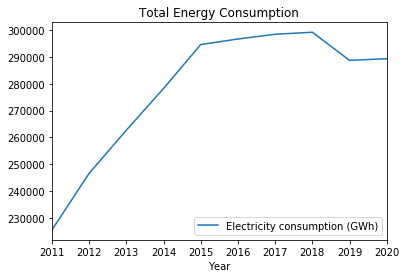

In [64]:
plot_e_consumption()

In [86]:
plot_nat_gas()

UnboundLocalError: local variable 'df_natgas_prod' referenced before assignment

,residential,industrial,commercial,government,others
year,,,,,
2011,109624.0,46726.0,33119.0,24141.0,11901.0
2012,120652.0,46627.0,39387.0,30614.0,9330.0
2013,126113.0,55636.0,38883.0,32126.0,9928.0
2014,134364.0,56619.0,41361.0,35940.0,9955.0
2015,144512.0,51857.0,47163.0,39673.0,11406.0
2016,143661.0,53588.0,48226.0,38498.0,12702.0
2017,143473.0,54862.0,48349.0,38665.0,13088.0
2018,130373.0,58204.0,46333.0,47593.0,16688.0
2019,128504.0,56624.0,46104.0,40716.0,16764.0


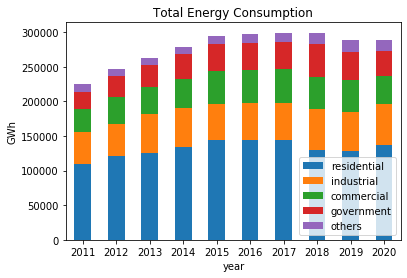

In [62]:
stacked_bar_e_consumption()

,consumption,production
2011,225511.0,9311.000
2012,246610.0,9763.000
2013,262686.0,9637.000
2014,278239.0,9712.700
2015,294611.0,10192.600
2016,296675.0,10460.200
2017,298437.0,9959.162
2018,299191.0,10317.287
2019,288712.0,9808.161
2020,289327.0,9213.210


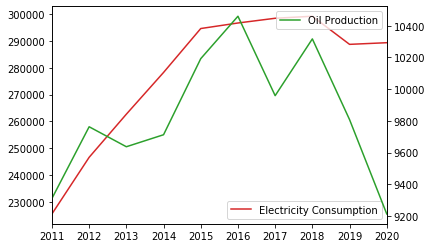

In [60]:
twinx_oil_production_e_consumption()

,Electricity consumption (GWh)
Region,
Central,67663.0
Eastern,69225.0
Southern,18242.0
Western,70381.0


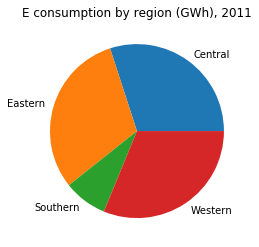

In [58]:
regions_consumption_pie()